In [1]:
!pip install control numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 12.1 MB/s eta 0:00:00


In [2]:
import control
import numpy as np
import matplotlib.pyplot as plt

print("Environment is all set up!")


Environment is all set up!


In [3]:
import control as ctrl

# Motor parameters
J = 0.01    # inertia
b = 0.1     # friction coefficient
K = 0.01    # motor constant

# Transfer function G(s) = K / (Js + b)
motor = ctrl.TransferFunction([K], [J, b])

motor


TransferFunction(
array([0.01]),
array([0.01, 0.1 ]),
outputs=1, inputs=1)

In [4]:
# PID gains (initial values)
Kp = 100       #Proportional Gain
Ki = 200       #Intergral Gain
Kd = 10        #Derivative Gain

# PID controller transfer function
pid = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

pid


TransferFunction(
array([ 10, 100, 200]),
array([1, 0]),
outputs=1, inputs=1)

In [5]:
# Closed-loop system with unity feedback
closed_loop = ctrl.feedback(pid * motor, 1)

closed_loop


TransferFunction(
array([0.1, 1. , 2. ]),
array([0.11, 1.1 , 2.  ]),
outputs=1, inputs=1)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

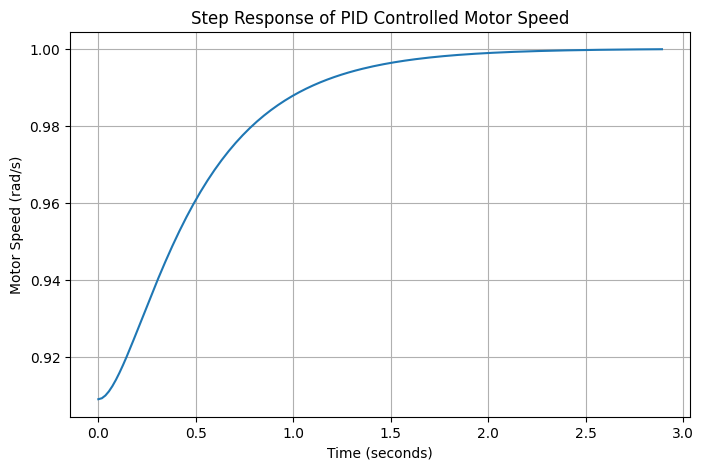

In [7]:

# Step response
t, response = ctrl.step_response(closed_loop)

# Plot
plt.figure(figsize=(8,5))
plt.plot(t, response)
plt.xlabel("Time (seconds)")
plt.ylabel("Motor Speed (rad/s)")
plt.title("Step Response of PID Controlled Motor Speed")
plt.grid(True)
plt.show()


In [8]:
info = ctrl.step_info(closed_loop)
info


{'RiseTime': 0.0,
 'SettlingTime': 0.7952129694841075,
 'SettlingMin': 0.9090909090909092,
 'SettlingMax': 1.0,
 'Overshoot': 0.0,
 'Undershoot': 0.0,
 'Peak': 0.9998675066380629,
 'PeakTime': 2.891683525396754,
 'SteadyStateValue': 1.0}

In [9]:
# Poles of the closed-loop system
poles = ctrl.poles(closed_loop)
poles


array([-7.61116484+0.j, -2.38883516+0.j])

In [10]:
#Comparing P vs PI vs PID
# P Controller
P = ctrl.TransferFunction([Kp], [1])

# PI Controller
PI = ctrl.TransferFunction([Kp, Ki], [1, 0])

# Closed-loop systems
sys_P = ctrl.feedback(P * motor, 1)
sys_PI = ctrl.feedback(PI * motor, 1)
sys_PID = closed_loop


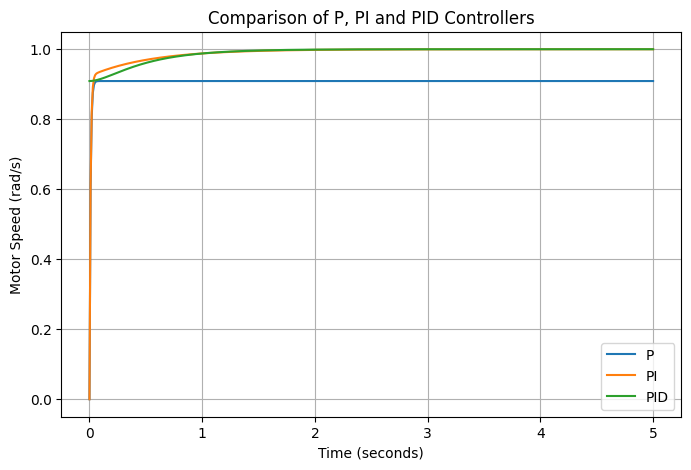

In [14]:
t = np.linspace(0, 5, 500)
yP = ctrl.step_response(sys_P, T=t)[1]
yPI = ctrl.step_response(sys_PI, T=t)[1]
yPID = ctrl.step_response(sys_PID, T=t)[1]

plt.figure(figsize=(8,5))
plt.plot(t, yP, label="P")
plt.plot(t, yPI, label="PI")
plt.plot(t, yPID, label="PID")

plt.xlabel("Time (seconds)")
plt.ylabel("Motor Speed (rad/s)")
plt.title("Comparison of P, PI and PID Controllers")
plt.legend()
plt.grid(True)
plt.show()

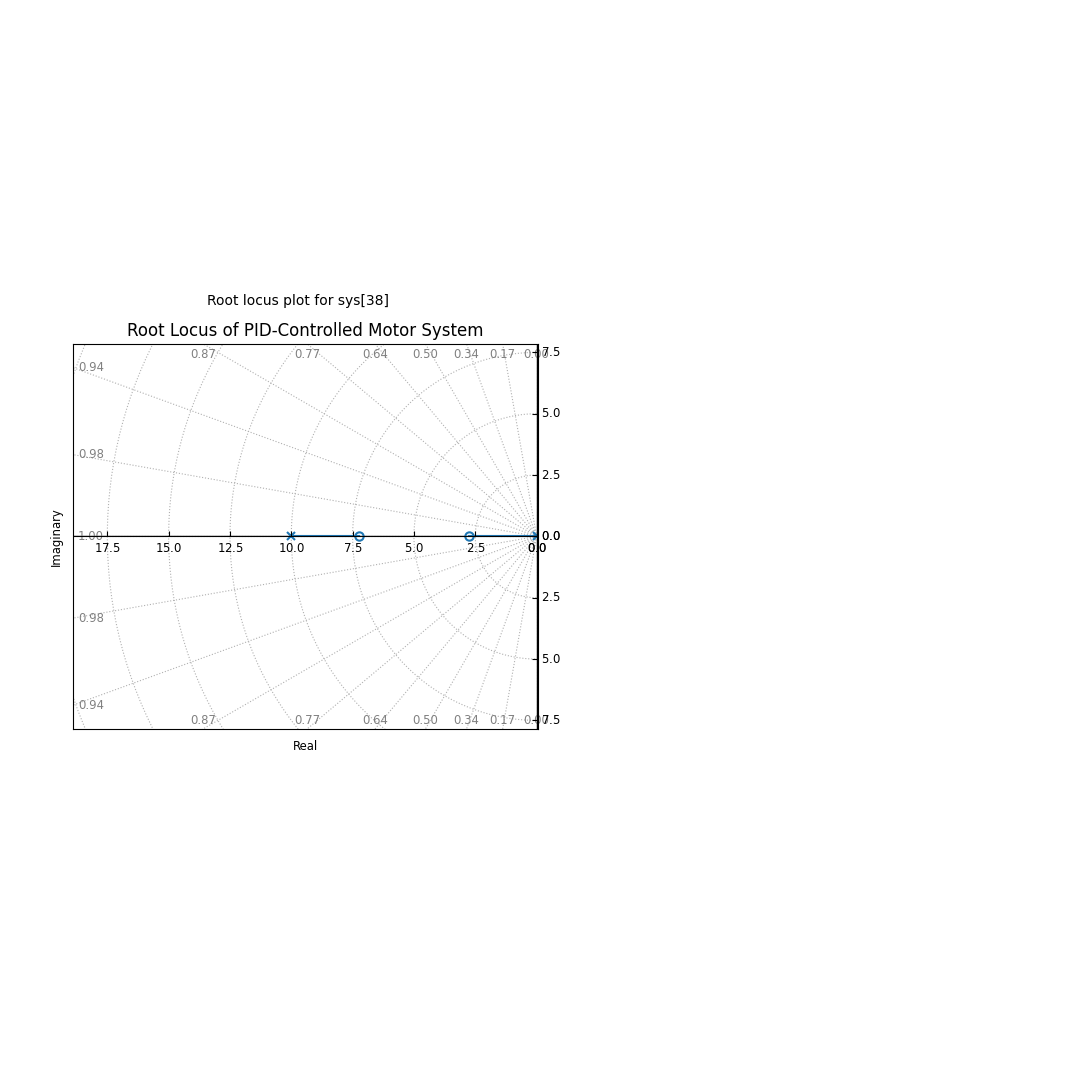

In [15]:
plt.figure(figsize=(6,5))
ctrl.root_locus(pid * motor, grid=True)
plt.title("Root Locus of PID-Controlled Motor System")
plt.show()


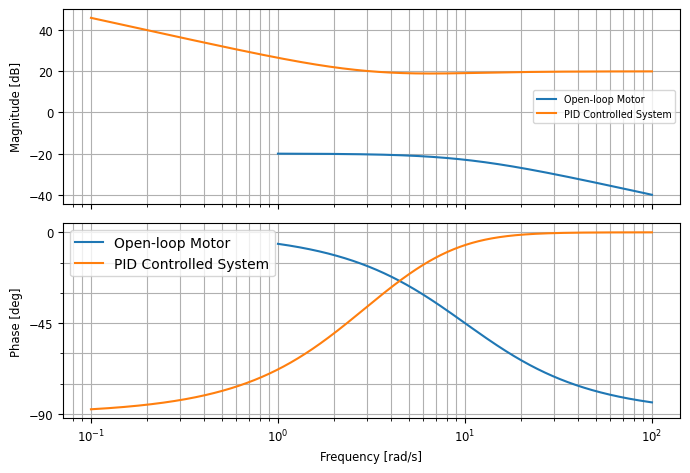

In [16]:
plt.figure(figsize=(7,5))
ctrl.bode_plot(motor, label="Open-loop Motor", dB=True)
ctrl.bode_plot(pid * motor, label="PID Controlled System", dB=True)
plt.legend()
plt.show()
